In [53]:

import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import random as r

#These all need to be installed to both run and visualize a tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

from io import StringIO
%matplotlib inline

from sklearn.metrics import confusion_matrix, roc_auc_score
import sys

#If it doesn't work, hard code the datadir
#datadir = ${path}
import imp
import course_utils as bd
imp.reload(bd)

<module 'course_utils' from 'C:\\SourceCode\\NYUDataScience1001-edTech\\FeatureSelection\\course_utils.py'>

In [54]:


# Load full dataset from CSV
# set Index_col = none so that our index is auto-increment
full_df = pd.DataFrame.from_csv('data/RawData.csv',index_col=None)

# Code inspired by http://stackoverflow.com/questions/12190874/pandas-sampling-a-dataframe
# Randomly sample 20% of the indicies in the list of indexes
rows = r.sample(list(full_df.index),int(len(full_df)*.2))

# testing data = only rows where index is in the 80% random sample
test_df = full_df.ix[rows]

# training data = drop the rows that were used in the test data
train_df = full_df.drop(rows)



In [55]:
lab = 'TargetVariable'


from sklearn.tree import DecisionTreeClassifier

# Entropy as our splitting criteria
clf = DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(train_df.drop(lab,1), train_df[lab])




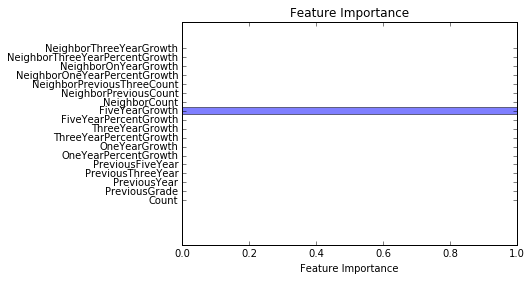

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline

import pydotplus
feature_names = list(train_df.drop(lab,1).columns.values)
y_pos = np.arange(len(feature_names))
importance = clf.feature_importances_

plt.barh(y_pos,importance,align='center',alpha=0.5)
plt.yticks(y_pos,feature_names)
plt.xlabel('Feature Importance')
plt.title('Feature Importance')
plt.show()